In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Global definitions of parameters
alpha = 1/3
n = 0.02
rho = 0.04
A = 1
delta = 1

In [3]:
def c1_gen(w,s):
    return w-s

def c2_gen(r,s):
    return (1+r)*s

def utility(c1,c2,rho):
    return np.log(c1)+(1/(1+rho))*np.log(c2)

In [4]:
def output(K,L,alpha,A):
    return A*(K**alpha)*(L**(1 - alpha))
def profit(output,w,L,r,K,delta=1):
    return output-w*L-(r+delta)*K

In [5]:
#Solving the general model gives:
def r(k,alpha,A,delta):
    return alpha*A*k**(alpha-1)-delta
def w(k,alpha,A):
    return (1-alpha)*A*k**alpha
def s(w,rho):
    return w/(2+rho)

In [6]:
#a: Guess
k_ss = 0.6

#b: Calculate r_ss and w_ss for guess
r_ss = r(k_ss,alpha,A,delta)
w_ss = w(k_ss,alpha,A)
print('Interest Rate Steady State: ',r_ss)
print('Wages Steady State: ',w_ss)

#c: Solve household problem
s_ss = s(w_ss,rho)

print('Savings Steady State: ',s_ss)

c1 = c1_gen(w_ss,s_ss)
c2 = c2_gen(r_ss,s_ss)
util = utility(c1,c2,rho)
print('Consumption 1 Steady State: ', c1)
print('Consumption 2 Steady State: ', c2)
print('Utility Steady State: ', util)


k_sst = ((1-alpha)/((2+rho)*(1+n)))**(1/(1-alpha))
print(k_sst)

k_ss-k_sst == 0

Interest Rate Steady State:  -0.5314262970545838
Wages Steady State:  0.5622884435344996
Savings Steady State:  0.27563158996789194
Consumption 1 Steady State:  0.28665685356660764
Consumption 2 Steady State:  0.12915371475998777
Utility Steady State:  -3.217500176800699
0.18135001783804433


False

log(-s + w) + log(s*(r_t+1 + 1))/(rho + 1)
Eq(s, -1/(-s + w) + 1/(s*(rho + 1)))


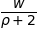

In [29]:
# CHECK IF WE CAN GET THIS TO WORK!

sm.init_printing(use_unicode=True)

K = sm.symbols('K')
L = sm.symbols('L')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
rho = sm.symbols('rho')
s = sm.symbols('s')
n = sm.symbols('n')
U = sm.symbols('U')
w = sm.symbols('w')
r_plus = sm.symbols('r_t+1')



U = sm.log(w-s)+(1/(1+rho))*sm.log((1+r_plus)*s)
print(U)

u1 = sm.diff(U,s)

u = sm.Eq(s,u1)
u
print(u)
usolve = sm.solve(-1/(-s + w) + 1/(s*(rho + 1)),s)[0]

usolve